In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo

In [3]:
def radioluminosity(flux,ferr,z, ld=1070.1):
    #ld = 1070.1 #Mpc #cosmo.luminosity_distance(0.218)
    f_p = flux *1e-23
    lum = 4*3.142*(ld*3.08568*10**24)**2*f_p/(1+z)
    #error in luminosity
    #lum_err = 4*3.142*(ld*3.08568*10**24)**2*np.sqrt((2*ld*3.08568*10**24*ferr*1e-23)**2)
    lum_err = lum*np.sqrt((ferr/flux)**2 )        
    return lum, lum_err

In [7]:
#first epoch detection at 9.77GHz
flux = 4.04E-05 #0.04*1e-3
ferr= 7.8e-6 #0.01*1e-3
z = 0.218
radioluminosity(flux,ferr,z), flux*1e6,ferr*1e6, flux/(ferr) , 4.545176454172514e+28/ 8.775340678847924e+27

((4.545176454172514e+28, 8.775340678847924e+27),
 40.4,
 7.8,
 5.17948717948718,
 5.17948717948718)

In [6]:
#second epoch detection at 6.05GHz 3.18E-05 +/- 9.5e-6 0.0318,0.0095
flux = 3.18E-05 #0.03*1e-3
ferr= 9.5e-6  #0.01*1e-3
z = 0.218
radioluminosity(flux,ferr,z),flux*1e6,ferr*1e6,flux/(ferr), 3.577638892145692e+28/0.711068791492936606e+28 #,(3.3751310303261247e+28, 1.125043676775375e+28)

((3.577638892145692e+28, 1.068791492936606e+28),
 31.8,
 9.5,
 3.3473684210526313,
 5.031354117840271)

In [28]:
#second epoch detection at 14 GHz 2.58E-05 +/- 5.6e-6, plotmodel(14.75,0.0155, 0.0056)
flux = 0.0155*1e-3 #2.58E-05 #
ferr= 0.0056*1e-3 #5.6e-6 #
z = 0.218
radioluminosity(flux,ferr,z),flux*1e6,ferr*1e6, flux/(1*ferr), 1.7438176990018312e+28/6.300244589942099e+27

((1.7438176990018312e+28, 6.300244589942099e+27),
 15.5,
 5.6,
 2.7678571428571432,
 2.7678571428571432)

In [68]:
#second epoch limit at 3GHz 
flux = 0.00021048 
ferr= 0
z = 0.218
radioluminosity(flux,ferr,z),flux*1e6

((2.367991930876809e+29, 0.0), 210.48000000000002)

In [69]:
#second epoch limit at 9GHz 
flux = 0.0000258
ferr= 0
z = 0.218
radioluminosity(flux,ferr,z),flux*1e6

((2.9026126860804673e+28, 0.0), 25.8)

In [51]:
#3rd epoch at 6GHz Flux = 0.0317 mJy Flux_err = 0.0063 mJy ,0.0317,0.0063
flux = 0.0317*1e-3 #mJy 
ferr = 0.0063*1e-3 #mJy 
z = 0.218
radioluminosity(flux,ferr,z),flux*1e6,ferr*1e6,flux/(1*ferr)  #(3.3751310303261247e+28, 1.125043676775375e+28)

((3.566388455377938e+28, 7.087775163684862e+27), 31.7, 6.3, 5.031746031746032)

In [70]:
#3rd epoch at 3GHz Flux = 0.0000567 
flux = 0.0000567
ferr = 0
z = 0.218
radioluminosity(flux,ferr,z),flux*1e6,

((6.378997647316376e+28, 0.0), 56.7)

In [71]:
#3rd epoch at 9GHz Flux = 1.9847e-5
flux = 1.9847e-5
ferr = 0
z = 0.218
radioluminosity(flux,ferr,z),flux*1e6,

((2.2328741852960866e+28, 0.0), 19.847)

In [2]:
import numpy as np
from scipy.stats import norm

# Example flux values and their uncertainties
F1 = 4.04E-05 # replace with your actual flux value at epoch 1
sigma_F1 = 7.8e-6  # replace with your actual uncertainty of flux at epoch 1
F3 = 1.9847e-5  # replace with your actual flux value at epoch 3
sigma_F3 = 6.6e-6  # replace with your actual uncertainty of flux at epoch 3

# Calculate the difference and the combined uncertainty
difference = F1 - F3
combined_uncertainty = np.sqrt(sigma_F1**2 + sigma_F3**2)

# Calculate the z-score
z_score = difference / combined_uncertainty

# Calculate the p-value from the z-score
p_value = 2 * (1 - norm.cdf(abs(z_score)))  

# Output the results
print(f'Z-score: {z_score}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the flux at epoch 1 and epoch 3.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the flux at epoch 1 and epoch 3.")


Z-score: 2.0115228619476166
P-value: 0.044270257991255946
Reject the null hypothesis: There is a significant difference between the flux at epoch 1 and epoch 3.


## Alternative Probaility test

In [41]:

np.random.seed(42)
Epoch1 = np.random.normal(40,7.8,1000)
Epoch3 = np.random.normal(40,6.6,1000)
Difference = Epoch1-Epoch3
Difference[np.where(Difference > 20)]
nsig = len(Difference[np.where(Difference > 20)])
prob = nsig/1000
prob_error = np.sqrt(prob * (1 - prob) / 1000)

prob, prob_error

(0.025, 0.0049371044145328745)

In [41]:
#PS1-11aop
z = 0.218
flux = np.array([4.04E-05,3.18E-05,0.0155*1e-3,0.00021048,0.0000258,0.0317*1e-3,0.0000567,1.9847e-5])
flux_err = np.array([7.8e-6,9.5e-6,0.0056*1e-3,0,0,0.0063*1e-3,0,0])
v = np.array([9.77,6.05,14.75,3,9.02,5.99,2.99,9.04])*1e9
#time = []
vlum = [5.869560895223366e+38,2.8609625866007866e+38,3.399800256570533e+38,9.389917436889655e+38,
       3.4606360481490135e+38,2.8236818900749368e+38,2.521064349468222e+38,2.6680439788172095e+38]
vlumerr = [1.1332320540282736e+38,8.546900809027506e+37,1.228314931406128e+38,0,0,5.611733724754607e+37,
          0,0,]
a = 7
radioluminosity(flux[a],flux_err[a],z,ld=0)[0]*v[a],radioluminosity(flux[a],flux_err[a],z,ld=0)[1]*v[a]


(2.6680439788172095e+38, 0.0)

In [2]:
#Read-in radio data
df2 = pd.read_csv('sndetec.csv') #reads in the detected Luminosity data parameters
df4 = pd.read_csv('othersne.csv') #reads in the other SNe data parameters

df2.columns=['Target', 'Obs. Date (MJD)','date of g-max', 'days', 'redshift', 'D(luminosity)', 'Flux/upper limits', 'Radioluminosity','logl','freq','status','restdays','logr','freqtime','logrt','vlum','logvlum']
df4.columns=['SN','time','DL','Flux(Jy)','Luminosity(erg/s/Hz)','logvlum','logrt','freqtime','logrt','freq','vlum','logvlum']


In [18]:
def nuluminosity(flux,ferr,fre,z,ld=1070.1):
    #ld = 1070.1 #Mpc #cosmo.luminosity_distance(0.218)
    f_p = flux *1e-23
    lum = 4*3.142*(ld*3.08568*10**24)**2*f_p/(1+z)
    #error in luminosity
    vlum = lum*fre*1e9
    vlum_err = lum*np.sqrt((ferr/flux)**2)*freq*1e9      
    return vlum#, vlum_err

In [21]:
2019-1986
33*365# 12053.2

12045

In [22]:
#SN 1986J https://iopscience.iop.org/article/10.3847/2041-8213/ac375e/pdf
lum = 1.6e26 # ± 0.2 × 1026 
lumer = 0.2e26
freq = 3*1e9
vlum = lum*freq
time = 4745 #13 years from plot in Figure 2 of paper
vlum_err = vlum*np.sqrt((lumer/lum)**2)
vlum, vlum_err #(4.8e+35, 6e+34)

(4.8e+35, 6e+34)

In [23]:
#SN 2002hi  https://iopscience.iop.org/article/10.3847/2041-8213/ac375e/pdf
lum = 1.7e29 # (1.7 ± 0.2) × 1029
lumer = 0.2e29
freq = 3*1e9
vlum = lum*freq
time = 3835.125 #10.5 years from plot in Figure 2 of paper
vlum_err = vlum*np.sqrt((lumer/lum)**2)
vlum, vlum_err #(5.099999999999999e+38, 5.9999999999999995e+37)

(5.099999999999999e+38, 5.9999999999999995e+37)

In [11]:
#radio detections of SN2017ens https://iopscience.iop.org/article/10.3847/2041-8213/acf1fd
fluxes1 = [38,25,46,38,22] #uJy
flux_err1 = [5,6,7,6,8] #uJy
freq = np.array([6,10,3,10,6]) #GHz
time = [1334.715,1342.506,1342.529,1601.942,1601.959] #days
zred = 0.1086
ld = 490 #Mpc


In [12]:
#SN2017ens 
flux = fluxes1[0]*1e-6
ferr= flux_err1[0]*1e-6
fre = freq[0]
z = 0.1086
#radioluminosity(flux,ferr,z,ld=490) 
nuluminosity(flux,ferr,fre,z,ld=490)

5.909082807696143e+37

In [13]:
#SN2017ens 
flux = fluxes1[1]*1e-6
ferr= flux_err1[1]*1e-6
fre = freq[1]
z = 0.1086
#radioluminosity(flux,ferr,z,ld=490)
nuluminosity(flux,ferr,fre,z,ld=490)

6.479257464579104e+37

In [15]:
#SN2017ens 
flux = fluxes1[2]*1e-6
ferr= flux_err1[2]*1e-6
z = 0.1086
#radioluminosity(flux,ferr,z,ld=490)
nuluminosity(flux,ferr,fre,z,ld=490)

1.1921833734825552e+38

In [16]:
#SN2017ens 
flux = fluxes1[3]*1e-6
ferr= flux_err1[3]*1e-6
z = 0.1086
#radioluminosity(flux,ferr,z,ld=490)
nuluminosity(flux,ferr,fre,z,ld=490)

9.848471346160239e+37

In [17]:
#SN2017ens 
flux = fluxes1[4]*1e-6
ferr= flux_err1[4]*1e-6
z = 0.1086
#radioluminosity(flux,ferr,z,ld=490)
nuluminosity(flux,ferr,fre,z,ld=490)

5.701746568829612e+37

In [ ]:
nulum = np.array([5.909082807696143e+37,6.479257464579104e+37,1.1921833734825552e+38,9.848471346160239e+37,5.701746568829612e+37])
time = [1334.715,1342.506,1342.529,1601.942,1601.959] #days


In [7]:

def radioluminosity(flux,ferr,z, ld=0):
    f_p = flux *1e-23

    if ld==0:
        ld = cosmo.luminosity_distance(z)
        lum=4*3.142*(ld.value*3.08568*10**24)**2*f_p#/(1+z)
        lum_err = lum*np.sqrt((ferr/flux)**2 )
    else:
        lum = 4*3.142*(ld*3.08568*10**24)**2*f_p#/(1+z)
        #error in luminosity
        #lum_err = 4*3.142*(ld*3.08568*10**24)**2*np.sqrt((2*ld*3.08568*10**24*ferr*1e-23)**2)
        lum_err = lum*np.sqrt((ferr/flux)**2 )  
          
    return lum, lum_err

In [23]:
#SN 2010jl radio https://arxiv.org/pdf/1507.06059.pdf
z = 0.0107
flux = np.array([60.9,38.3, 76.6,111.9,131.3,118.8, 115.3,123.0,91.3])*1e-6
flux_err = np.array([17.6,20.7,20.3,17.8,22.1,16.8,17.1,26.8,34.8])*1e-6
v = np.array([21.20,21.20,9,5.5, 5.50,9,21.2,8.68,5.5])*1e9
time = [566.03,570.10, 681.71, 682.71, 793.46, 794.40,794.53, 984.96, 985.94]
vlum = [3.529671133298247e+36,2.2198095961465161e+36,1.8847439967281742e+36,1.6825728064786117e+36,
      1.9742789051889338e+36,2.9230755458395184e+36,6.682612178477634e+36,2.918810676917418e+36,
      1.3728230315594033e+36]
vlumerr = [1.0200691616756838e+36,1.1997404344708325e+36,4.994817641459782e+35,2.6764786376514108e+35,
         3.3230437018031563e+35,4.133642186035683e+35,9.910899241280794e+35,6.359685052145269e+35,
          5.232666100576915e+35]
a = 8
#radioluminosity(flux[a],flux_err[a],z,ld=0)[0]*v[a],radioluminosity(flux[a],flux_err[a],z,ld=0)[1]*v[a]


(1.3728230315594033e+36, 5.232666100576915e+35)

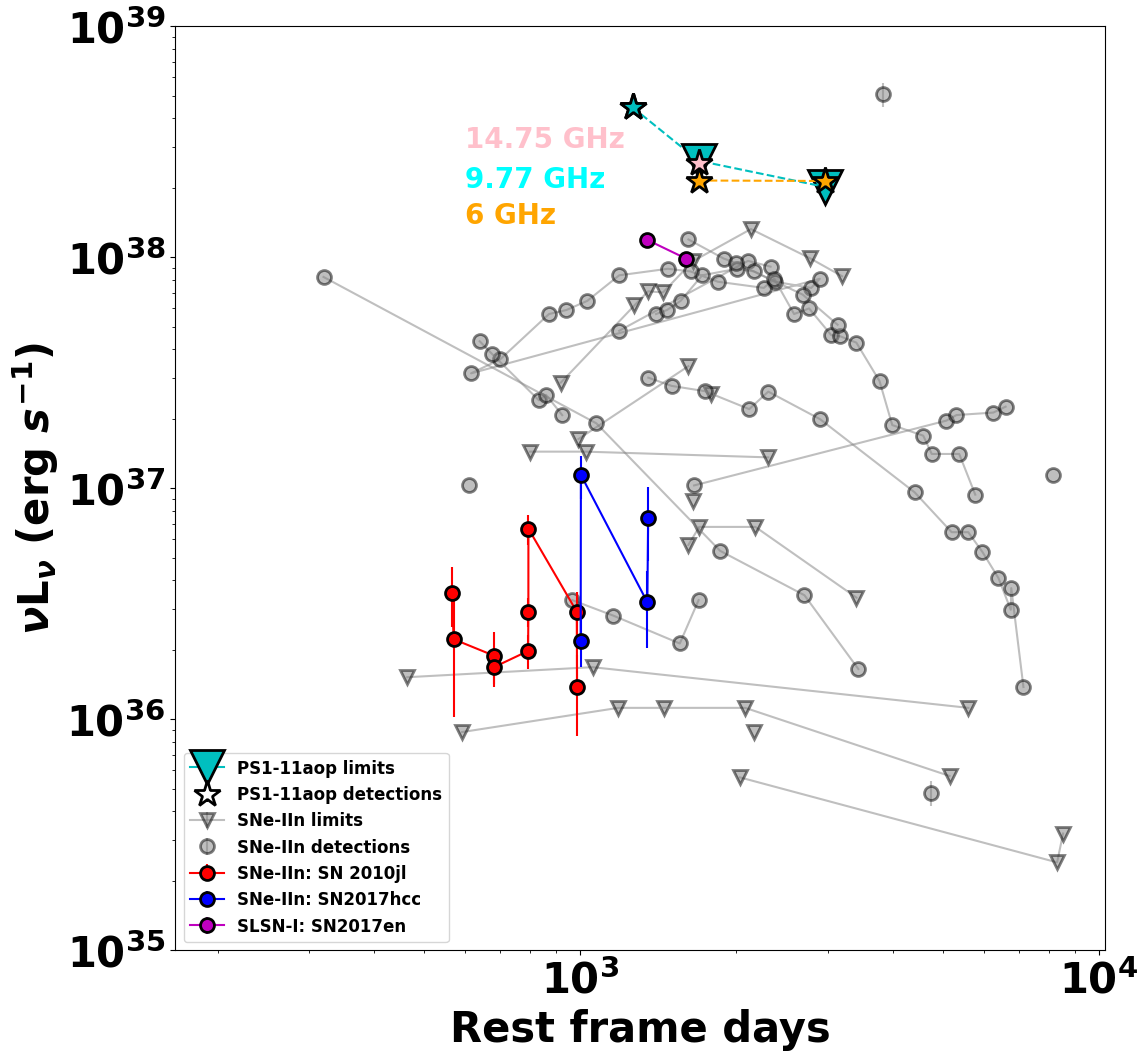

In [3]:
#this code plots the other supernovae with the observed PS1 ones

markeredgecolor='k'
markeredgewidth=2
fig = plt.figure(figsize=(12,12))
from matplotlib import rc,rcParams
rc('font', weight='bold')
#upper limits
plt.errorbar(10**(df2['logr'][3]), 10**(df2['logvlum'][3]),yerr=0,fmt='v-',color = 'c', markersize=25,markeredgecolor='k',markeredgewidth=2,label = 'PS1-11aop limits')#label = xband
#plt.plot(10**(df2['logr'][5]), 10**(df2['logvlum'][5]),'v',color = 'lime', markersize=25,markeredgecolor='k',markeredgewidth=2) # marker_color='b')

plt.plot(10**(df2['logr'][7]), 10**(df2['logvlum'][7]),'v-',color = 'c', markersize=25,markeredgecolor='k',markeredgewidth=2) # marker_color='b')
#plt.plot(10**(df2['logr'][8]), 10**(df2['logvlum'][8]),'v-',color = 'lime', markersize=10,markeredgecolor='k',markeredgewidth=2) # marker_color='b')

#PS1-11aop
plt.errorbar(10**(df2['logr'][1]), 10**(df2['logvlum'][1]),yerr=8.775e27 ,fmt='*',color = 'white', ecolor='k',markersize=20,markeredgecolor='k',markeredgewidth=2,label = 'PS1-11aop detections')
#detections
plt.errorbar(10**(df2['logr'][1]), 10**(df2['logvlum'][1]),yerr=8.775e27 ,fmt='*',color = 'c',ecolor='k', markersize=20,markeredgecolor='k',markeredgewidth=2)
plt.errorbar(10**(df2['logr'][2]), 10**(df2['logvlum'][2]),yerr=1.068e28 ,fmt='*',color = 'orange',ecolor='k', markersize=20,markeredgecolor='k',markeredgewidth=2)#label = cband
plt.errorbar(10**(df2['logr'][4]), 10**(df2['logvlum'][4]),yerr=6.300e27 ,fmt='*',color = 'pink',ecolor='k', markersize=20,markeredgecolor='k',markeredgewidth=2)#label = kuband
plt.errorbar(10**(df2['logr'][6]), 10**(df2['logvlum'][6]),yerr=7.0877e27 ,fmt='*',color = 'orange',ecolor='k', markersize=20,markeredgecolor='k',markeredgewidth=2) # marker_color='b')


#Add connecting lines to the same frequencies
plt.plot([10**(df2['logr'][1]),10**(df2['logr'][3]),10**(df2['logr'][7])],
         [10**(df2['logvlum'][1]),10**(df2['logvlum'][3]),10**(df2['logvlum'][7])],linestyle='--',color='c')
plt.plot([10**(df2['logr'][2]),10**(df2['logr'][6])],[10**(df2['logvlum'][2]),10**(df2['logvlum'][6])],linestyle='--',color='orange')

#other SNe upper limit
plt.plot(10**(3.334453751), 10**(35.94448267),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1987B') #
plt.plot(10**(3.252853031), 10**(37.40823997),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1988I') #

plt.plot(10**(3.161368002), 10**(36.04921802),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1989C') #
plt.errorbar(10**(3.217483944), 10**(36.94448267),yerr=0,fmt='v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2,label='SNe-IIn limits')#label = 'SN1989R') #

#SN 1986J (1.6 ± 0.2) × 1026


plt.plot(10**(df4['logrt'][5:8]), 10**(df4['logvlum'][5:8]),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1978g') # marker_color='b')

plt.plot(10**(df4['logrt'][9:12]), 10**(df4['logvlum'][9:12]),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)# label = 'SN1983k') # marker_color='b')

plt.plot(10**(df4['logrt'][13:17]), 10**(df4['logvlum'][13:17]),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1984E') # marker_color='b')

plt.plot(10**(df4['logrt'][18:22]), 10**(df4['logvlum'][18:22]),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1987F') # marker_color='b')

plt.plot(10**(df4['logrt'][23:25]), 10**(df4['logvlum'][23:25]),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1991ae') # marker_color='b')
plt.plot(10**(df4['logrt'][26:29]), 10**(df4['logvlum'][26:29]),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1991ar') # marker_color='b')

plt.plot(10**(df4['logrt'][30:40]), 10**(df4['logvlum'][30:40]),'v-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN2006jd') # marker_color='b')

plt.plot(10**(df4['logrt'][41:56]), 10**(df4['logvlum'][41:56]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)#,label = 'SN1995N')

plt.plot(10**(df4['logrt'][63:68]), 10**(df4['logvlum'][63:68]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1998S') # marker_color='b')
plt.plot(10**(df4['logrt'][69:71]), 10**(df4['logvlum'][69:71]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1978K') # marker_color='b')

plt.errorbar(10**(2.784930955), 10**(37.01502801),yerr=0,fmt='o',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2,label = 'SNe-IIn detections') # marker_color='b') #SN2005kd

plt.plot(10**(df4['logrt'][74:79]), 10**(df4['logvlum'][74:79]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1986j') # marker_color='b')
plt.plot(10**(df4['logrt'][80:113]), 10**(df4['logvlum'][80:113]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1988Z') # marker_color='b')

plt.plot(10**(df4['logrt'][115:117]), 10**(df4['logvlum'][115:117]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1997eg_5GHz') # marker_color='b')
plt.plot(10**(df4['logrt'][118:125]), 10**(df4['logvlum'][118:125]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)#,label = 'SN2001em') # detection
plt.plot(10**(df4['logrt'][126:132]), 10**(df4['logvlum'][126:132]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN2000ft_5GHz') # marker_color='b')
plt.plot(10**(df4['logrt'][133:138]), 10**(df4['logvlum'][133:138]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN2000ft') # marker_color='b')
plt.plot(10**(df4['logrt'][139:145]), 10**(df4['logvlum'][139:145]),'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2) #label = 'SN1996cr_5GHz') # marker_color='b')

#SN 2002hi  https://iopscience.iop.org/article/10.3847/2041-8213/ac375e/pdf
plt.errorbar(3835.125,5.09e38,5.99e37, fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN 1986J https://iopscience.iop.org/article/10.3847/2041-8213/ac375e/pdf
plt.errorbar(4745,4.8e35, 6e34,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)


#other SN detections
#SN 2010jl
time1 = [566.03,570.10, 681.71, 682.71, 793.46, 794.40,794.53, 984.96, 985.94]
vlum1 = [3.529671133298247e+36,2.2198095961465161e+36,1.8847439967281742e+36,1.6825728064786117e+36,
      1.9742789051889338e+36,2.9230755458395184e+36,6.682612178477634e+36,2.918810676917418e+36,
      1.3728230315594033e+36]
vlumerr1 = [1.0200691616756838e+36,1.1997404344708325e+36,4.994817641459782e+35,2.6764786376514108e+35,
         3.3230437018031563e+35,4.133642186035683e+35,9.910899241280794e+35,6.359685052145269e+35,
          5.232666100576915e+35]
plt.errorbar(time1,vlum1,yerr=vlumerr1,fmt='o-', color='red', markersize=10,markeredgecolor='k',markeredgewidth=2,label='SNe-IIn: SN 2010jl')

#SN 2017hcc
lum2 = np.array([2.19,11.42,3.21,7.46])*1e36
lumerr2 = np.array([0.51,2.40,1.17,2.63])*1e36
time2 = np.array([1002,1003,1347,1352])
plt.errorbar(time2,lum2,yerr=lumerr2,fmt='bo-', markersize=10,markeredgecolor='k',markeredgewidth=2,label='SNe-IIn: SN2017hcc')

#SN2017ens
nulum = np.array([1.1921833734825552e+38,9.848471346160239e+37])
time = [1342.529,1601.942] #days
#nulum = np.array([5.909082807696143e+37,6.479257464579104e+37,1.1921833734825552e+38,9.848471346160239e+37,5.701746568829612e+37])
#time = [1334.715,1342.506,1342.529,1601.942,1601.959] #days
plt.errorbar(time,nulum,yerr=[0,0],fmt='o-',color='m',markersize=10,markeredgecolor='k',markeredgewidth=2,label='SLSN-I: SN2017en') 


plt.text(600,3e38,'14.75 GHz',color='pink', fontsize = 20)
plt.text(600,2e38,'9.77 GHz',color='cyan',fontsize = 20)
plt.text(600,1.4e38,'6 GHz',color='orange',fontsize = 20)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Rest frame days', fontsize=30,fontweight='bold')
plt.ylabel(r'$\nu$L$_{\nu}$ (erg $s^{-1}$)', fontsize =30,fontweight='bold')

plt.legend(prop={'size': 12},loc='lower left',)#bbox_to_anchor=(1, 0.5))

plt.tick_params(labelsize = 30)
plt.ylim(1e35,1e39)
fig.savefig('SNelogf2_p.png',dpi = 300,transparent=True,bbox_inches='tight')



In [37]:
df2['logl'][1],df2['logl'][2], df2['logl'][3], df2['logl'][4]

(28.65871448, 28.55368658, 28.46287916, 28.24159115)

In [9]:
#check for variability in the PS1-11aop LC using VLA, if vs >= 4.3. (it is variable)
import numpy as np
fluxes = [0.0405*1e-3, 0.0258*1e-3,0.019847*1e-3] #Jy at 9.7GHz
fluxes_err = [0.0078*1e-3,0,6.6e-6] #Jy
n1 =0
n2 =2
S1 = fluxes[n1]  #Jy
S1_err = fluxes_err[n1] #Jy
S2 = fluxes[n2] #Jy
S2_err = fluxes_err[n2] #Jy
vs = (S1-S2)/np.sqrt(S1_err**2 + S2_err**2)
abs(vs) #1.8846153846153848, 2.647820512820513


2.021309865606195

In [15]:
(S1/S2), np.sqrt((S1_err/S1)**2 + (S2_err/S1)**2)

(2.040610671638031, 0.2522872054211319)

In [ ]:
σ(F1/F3) = sqrt((σ_F1/F1)^2 + (σ_F3/F3)^2)